In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib','inline')
import missingno as ms
%matplotlib inline

In [2]:
data=pd.read_csv('germancreditdata.csv')

In [3]:
data.head(3)

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [4]:
data.tail(3)

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(1000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Customer id         1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
data.describe()

,Customer id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


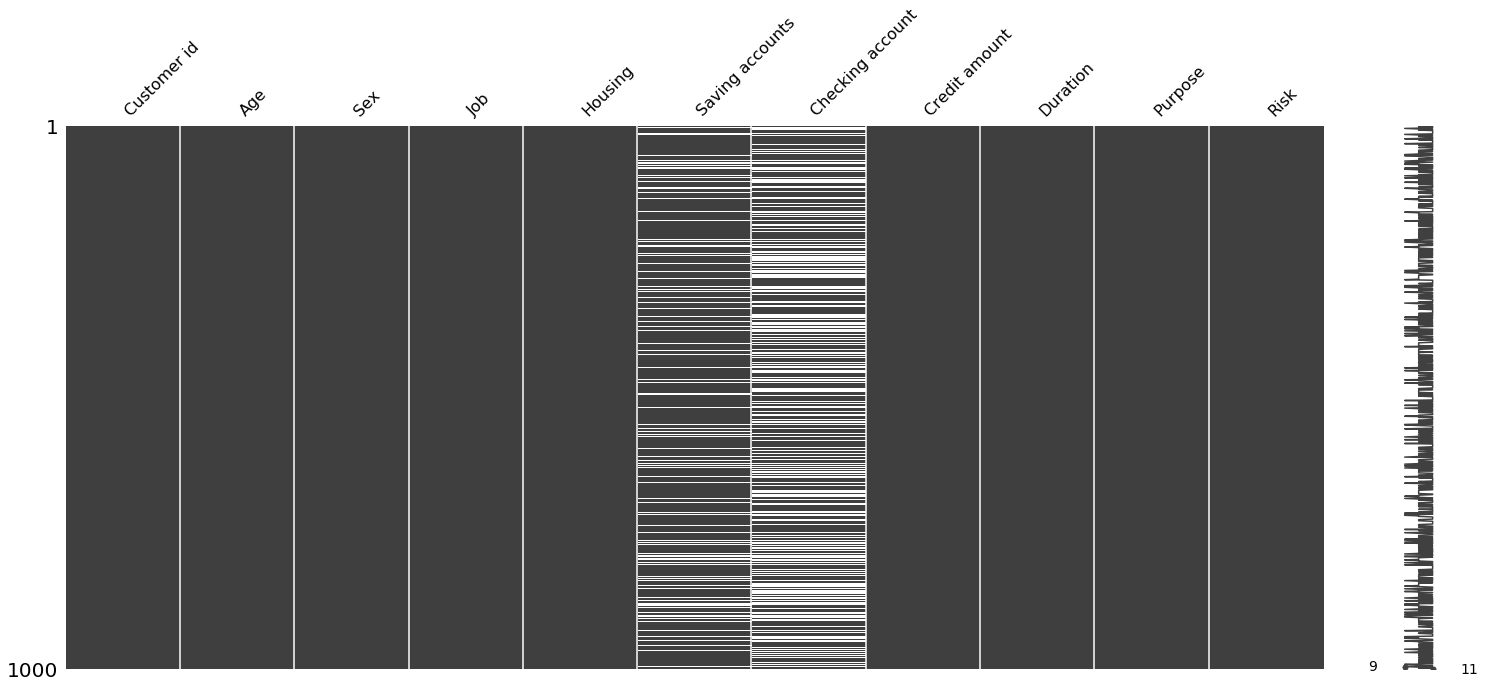

In [9]:
ms.matrix(data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Customer id         1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


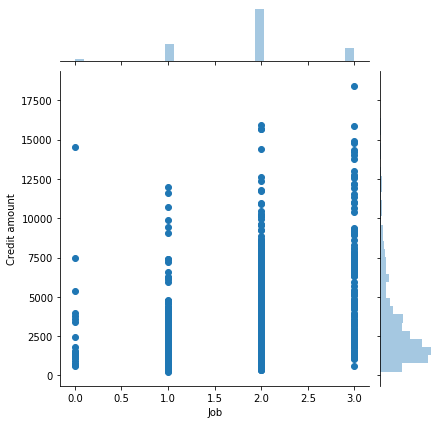

In [11]:
sns.jointplot(x='Job',y='Credit amount',data=data)

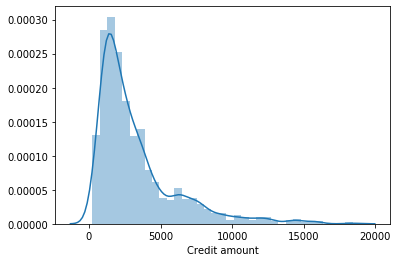

In [12]:
sns.distplot(data['Credit amount'])

In [13]:
data.corr()

,Customer id,Age,Job,Credit amount,Duration
Customer id,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


Text(0.5, 1, 'data.corr()')

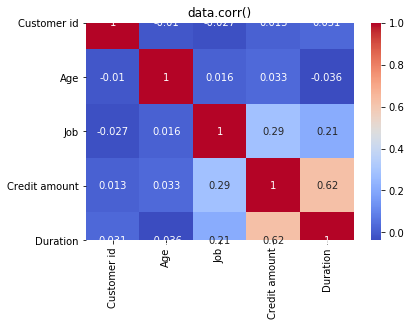

In [14]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True,annot=True)
plt.title('data.corr()')

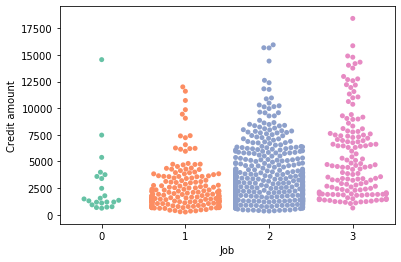

In [15]:
sns.swarmplot(x='Job',y='Credit amount',data=data,palette='Set2')

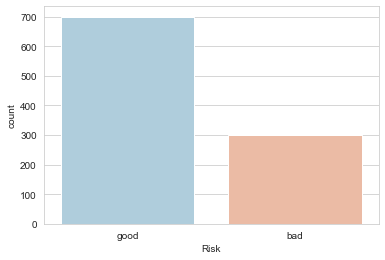

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=data,palette='RdBu_r')

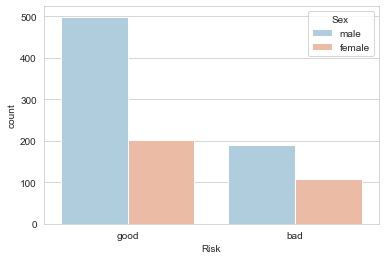

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Sex',data=data,palette='RdBu_r')

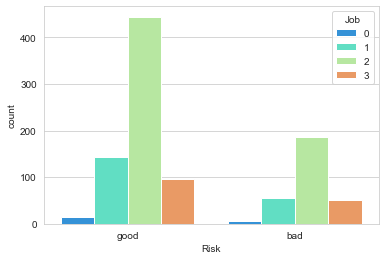

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Job',data=data,palette='rainbow')

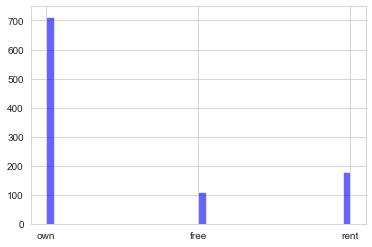

In [19]:
data['Housing'].hist(bins=40,color='blue',alpha=0.6)

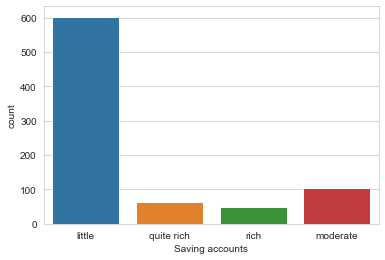

In [20]:
sns.countplot(x='Saving accounts',data=data)

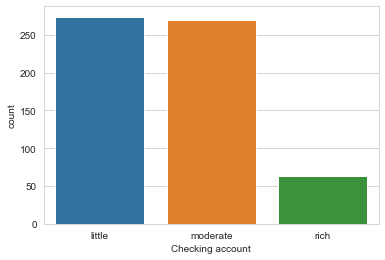

In [21]:
sns.countplot(x='Checking account',data=data)

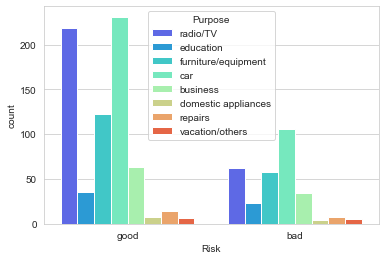

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Purpose',data=data,palette='rainbow')

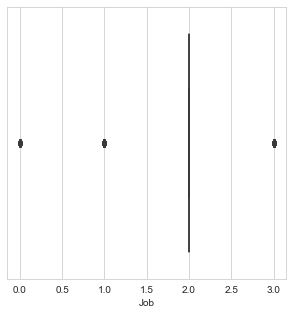

In [23]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Job',data=data,palette='winter')

In [24]:
data['Saving accounts'].mode()

0    little
dtype: object

In [25]:
def impute_savings(cols):
    Savingaccounts=cols[0]
    x="little"
    if pd.isnull(Savingaccounts):
        return x
    else:
        return Savingaccounts
        

In [26]:
data['Saving accounts']=data[['Saving accounts']].apply(impute_savings,axis=1)

In [27]:
data['Checking account'].mode()

0    little
dtype: object

In [28]:
def impute_checking(cols):
    Checkingaccount=cols[0]
    y="little"
    if pd.isnull(Checkingaccount):
        return y
    else:
        return Checkingaccount
 

In [29]:
data['Checking account']=data[['Checking account']].apply(impute_checking,axis=1)

In [30]:
data.head(15)

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,little,little,9055,36,education,good
6,6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,little,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


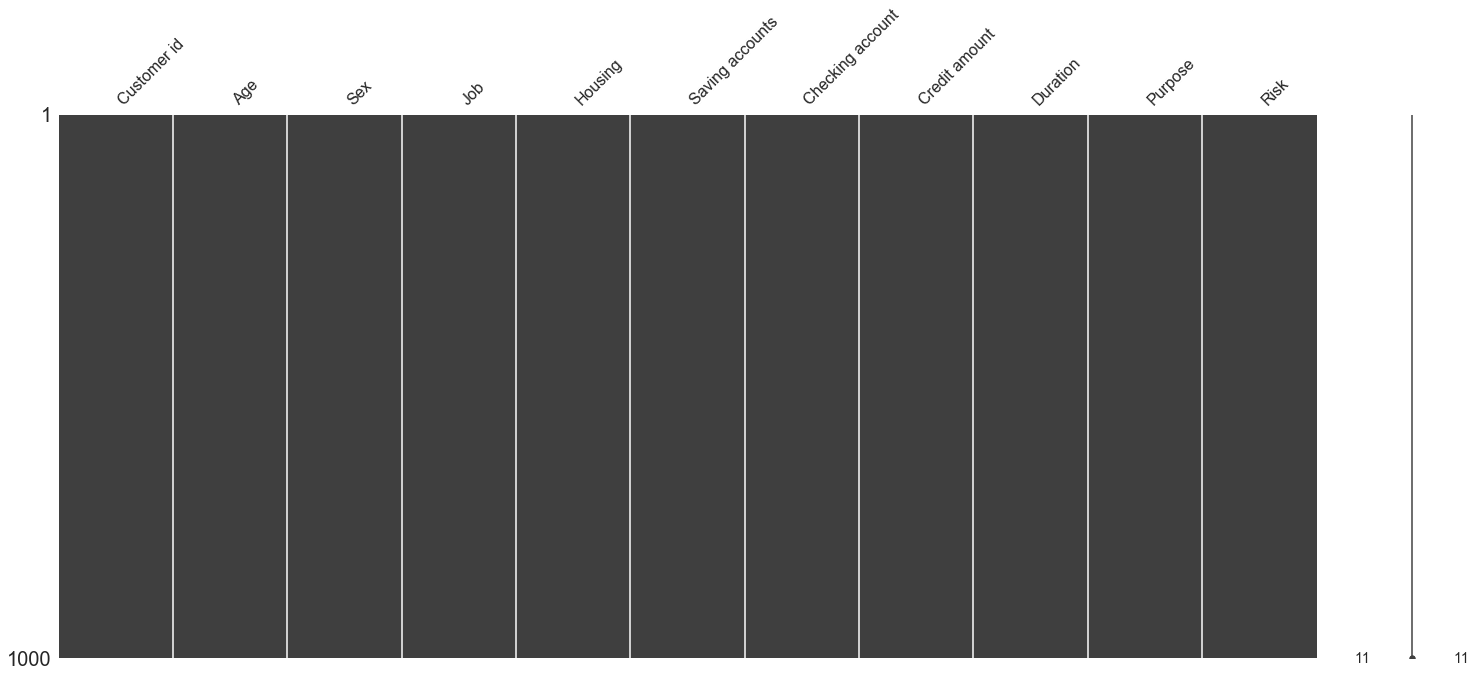

In [31]:
ms.matrix(data)

In [32]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
data['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [34]:
data['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [35]:
data['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [36]:
713+179+108

1000

In [37]:
data= data.merge(pd.get_dummies(data.Purpose,drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
data=data.merge(pd.get_dummies(data.Sex,drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
data=data.merge(pd.get_dummies(data.Housing,drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
data=data.merge(pd.get_dummies(data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
data=data.merge(pd.get_dummies(data.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
data=data.merge(pd.get_dummies(data["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

In [38]:
old_data = data.copy()
data.drop(['Sex','Housing','Saving accounts','Checking account','Purpose','Risk'],axis=1,inplace=True)
data.head()

,Customer id,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Check_moderate,Check_rich
0,0,67,2,1169,6,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1,1,22,2,5951,48,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,2,49,1,2096,12,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
3,3,45,2,7882,42,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,53,2,4870,24,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [39]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
Customer id                    1000 non-null int64
Age                            1000 non-null int64
Sex                            1000 non-null object
Job                            1000 non-null int64
Housing                        1000 non-null object
Saving accounts                1000 non-null object
Checking account               1000 non-null object
Credit amount                  1000 non-null int64
Duration                       1000 non-null int64
Purpose                        1000 non-null object
Risk                           1000 non-null object
Purpose_car                    1000 non-null uint8
Purpose_domestic appliances    1000 non-null uint8
Purpose_education              1000 non-null uint8
Purpose_furniture/equipment    1000 non-null uint8
Purpose_radio/TV               1000 non-null uint8
Purpose_repairs                1000 non-null uint8
Purpose_vacation/othe

In [40]:
data.head()

,Customer id,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Check_moderate,Check_rich
0,0,67,2,1169,6,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1,1,22,2,5951,48,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,2,49,1,2096,12,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
3,3,45,2,7882,42,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,53,2,4870,24,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [41]:
data.drop('Customer id',axis = 1,inplace=True)

In [42]:
data.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Check_moderate,Check_rich
0,67,2,1169,6,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,49,1,2096,12,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,45,2,7882,42,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,53,2,4870,24,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [43]:
data.describe()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Check_moderate,Check_rich
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.337000,0.01200,0.059000,0.181000,0.280000,0.022000,...,0.690000,0.713000,0.179000,0.103000,0.063000,0.048000,0.300000,0.700000,0.269000,0.063000
std,11.375469,0.653614,2822.736876,12.058814,0.472921,0.10894,0.235743,0.385211,0.449224,0.146757,...,0.462725,0.452588,0.383544,0.304111,0.243085,0.213873,0.458487,0.458487,0.443662,0.243085
min,19.000000,0.000000,250.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
data.drop('Risk_good',axis = 1,inplace=True)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Risk_bad',axis=1), 
                                                    data['Risk_bad'],test_size=0.25, 
                                                    random_state=100)

In [84]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\windows\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
predicted=logmodel.predict(X_test)

In [86]:
predicted


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
print(confusion_matrix(y_test, predicted))

[[163  16]
 [ 59  12]]


In [89]:
from sklearn.metrics import precision_score
print(precision_score(y_test,predicted))

0.42857142857142855


In [52]:
from sklearn.metrics import recall_score

print(recall_score(y_test,predicted))

0.1782178217821782


In [53]:
from sklearn.metrics import f1_score

print(f1_score(y_test,predicted))

0.2416107382550336


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       269
           1       0.38      0.18      0.24       101

    accuracy                           0.69       370
   macro avg       0.56      0.53      0.53       370
weighted avg       0.64      0.69      0.65       370



In [55]:
sample_data=pd.read_csv('sampletest.csv')

In [56]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
Customer id         10 non-null int64
Age                 10 non-null int64
Sex                 10 non-null object
Job                 10 non-null int64
Housing             10 non-null object
Saving accounts     10 non-null object
Checking account    10 non-null object
Credit amount       10 non-null int64
Duration            10 non-null int64
Purpose             10 non-null object
dtypes: int64(5), object(5)
memory usage: 928.0+ bytes


In [57]:
sample_data.head()

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,53,male,2,rent,little,little,4870,24,car
1,2,28,female,2,rent,little,little,1403,15,car
2,3,32,female,1,own,moderate,little,1282,24,radio/TV
3,4,44,female,3,free,little,moderate,12579,24,car
4,5,45,male,2,own,moderate,moderate,1804,12,car


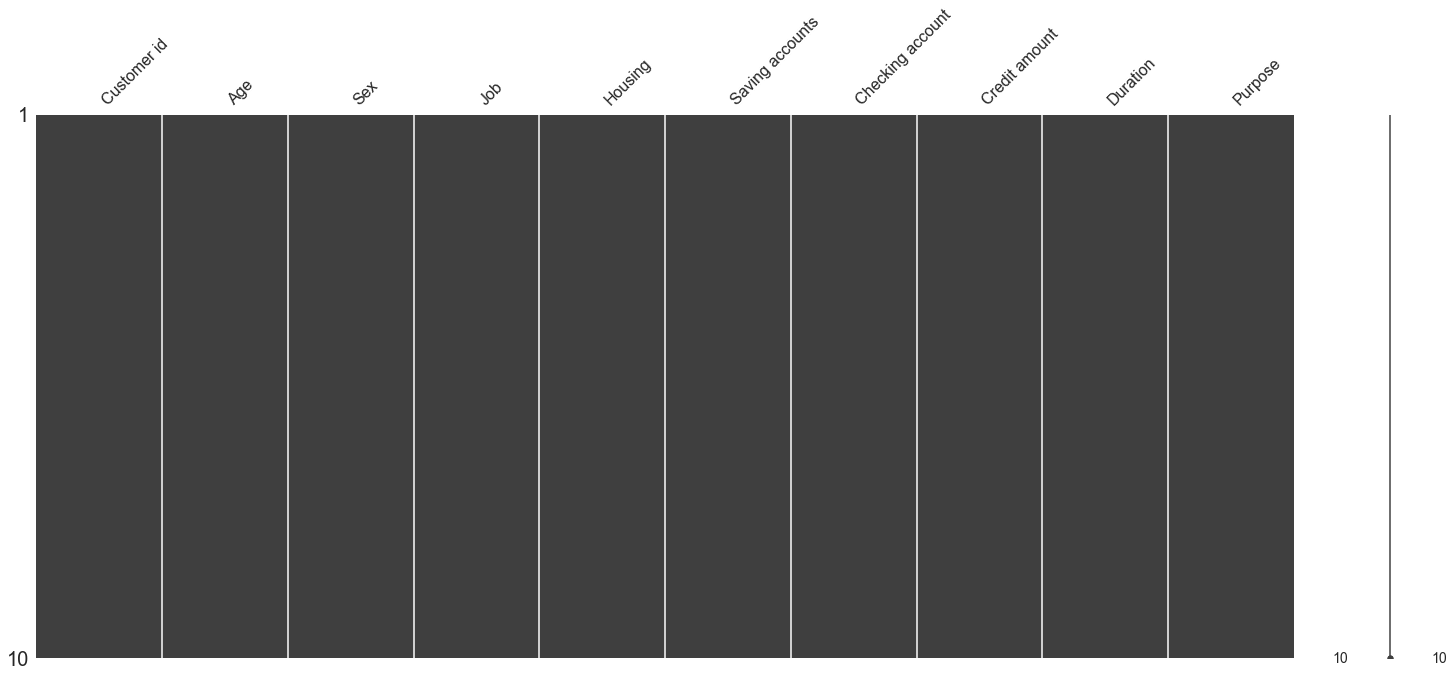

In [58]:
ms.matrix(sample_data)

In [59]:
sample_data= sample_data.merge(pd.get_dummies(sample_data.Purpose,drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
sample_data=sample_data.merge(pd.get_dummies(sample_data.Sex,drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
sample_data=sample_data.merge(pd.get_dummies(sample_data.Housing,drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
sample_data=sample_data.merge(pd.get_dummies(sample_data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Checking Account
sample_data=sample_data.merge(pd.get_dummies(sample_data["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)

In [60]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
Customer id                    10 non-null int64
Age                            10 non-null int64
Sex                            10 non-null object
Job                            10 non-null int64
Housing                        10 non-null object
Saving accounts                10 non-null object
Checking account               10 non-null object
Credit amount                  10 non-null int64
Duration                       10 non-null int64
Purpose                        10 non-null object
Purpose_car                    10 non-null uint8
Purpose_domestic appliances    10 non-null uint8
Purpose_radio/TV               10 non-null uint8
Sex_male                       10 non-null uint8
Housing_own                    10 non-null uint8
Housing_rent                   10 non-null uint8
Savings_moderate               10 non-null uint8
Savings_rich                   10 non-null uint8
Check_moder

In [90]:
predict1=logmodel.predict(sample_data)
predict1
df1=pd.DataFrame(predict1,columns=['Risk_bad'])
df2=pd.DataFrame(prod_data['Customer id'],columns=['Customer id'])
df2.head()
result = pd.concat([df2,df1],axis=1)
result.head()

ValueError: could not convert string to float: 'male'